### Predicting Sale price of Houses

In [61]:
# Libraries

#to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# to build the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Datset
data = pd.read_csv('train_house_price.csv')
print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# load submission data
submission = pd.read_csv('house_pricesubmission.csv')
print(submission.shape)

submission.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


The House Price dataset contains many variables for each one of the houses. Thus, manual inspection of each one of them is a bit time demanding. Therefore, here instead of deciding variable by variable what is the best way to proceed, we will try to automate the feature engineering pipeline, making some a priori decisions on when to apply one technique or the other, and then expanding them to the entire dataset.

In [4]:
# Types of Variables
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.

We also have an Id variable, that we shoulld not use for predictions Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.

In [5]:
print('Number of House Id  labels: {}'.format(len(data.Id.unique())))
print('Number of Houses in the Datasets: {}'.format(len(data)))

Number of House Id  labels: 1460
Number of Houses in the Datasets: 1460


In [6]:
# Find Categorical variables
categorical = [var for var in data.columns if data[var].dtype == 'O']
print('There are {} categorical variables in the data'.format(len(categorical)))

There are 43 categorical variables in the data


### Find temporal variables
There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables:

In [7]:
# find numerical variables first
numerical = [var for var in data.columns if data[var].dtype != 'O']

# list temporal variables
year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]
year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


We can see that these variables correspond to the years in which the houses were built or remodeled or a garage was built, or the house was indeed sold. It would be better if we captured the time elapsed between the time the house was built and the time the house was sold for example. We are going to do that in the feature engineering section.

We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:

Text(0,0.5,' Median House price')

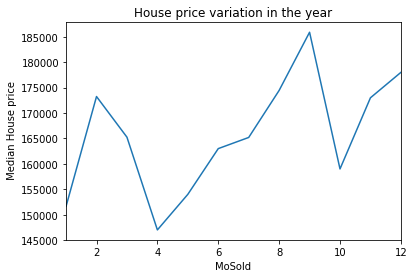

In [9]:
data.groupby('MoSold')['SalePrice'].median().plot()
plt.title("House price variation in the year")
plt.ylabel(" Median House price")

The price seems to vary depending on the time of the year in which the house is sold. This information will be captured when we engineer this variable later on.

In [10]:
# Find Discrete Variables
discrete = []
for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print("There are {} discrete variables".format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


In [11]:
# Continuous Variables
# skiping the Id variable and the target variable SalePrice, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Id','SalePrice'] and var not in year_vars]
print('There are {} continuous variables in the data'.format(len(numerical)))

There are 18 continuous variables in the data


Now we have inspected and have a view of the different types of variables that we have in the house price dataset. Let's move on to understand the types of problems that these variables have.

### Types of problem within the variables

#### Missing Values

In [12]:
# Number of variabls with missing data
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
print('There are {} variables with missing values'.format(len(vars_with_na)))

There are 19 variables with missing values


In [13]:
# percentage of missing values in variables with missing values
for var in data.columns:
    if data[var].isnull().sum() >0:
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


There are quite a few variables with missing information. And they differ in the percentage of observations for which information are missing. Let's go ahead and inspect those variables that show missing information for most of their observations.

In [14]:
# Inspecting variables with high amount of missing values
for var in vars_with_na:
    if data[var].isnull().mean() > 0.80:
        print(var, data[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


The variables with high amount of missiong values are all categorical and they will be treated during feature engineering.

#### Outliers

In [15]:
# numerical variables
numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

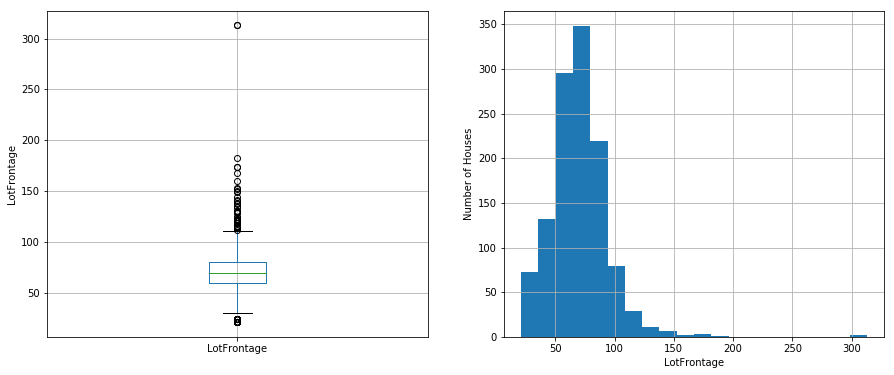

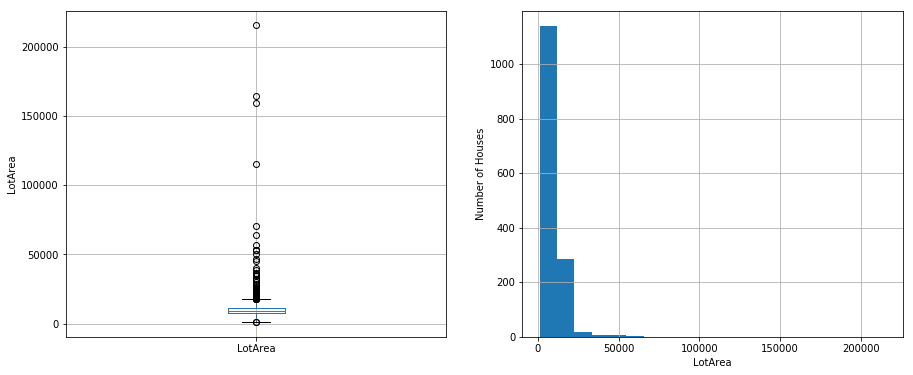

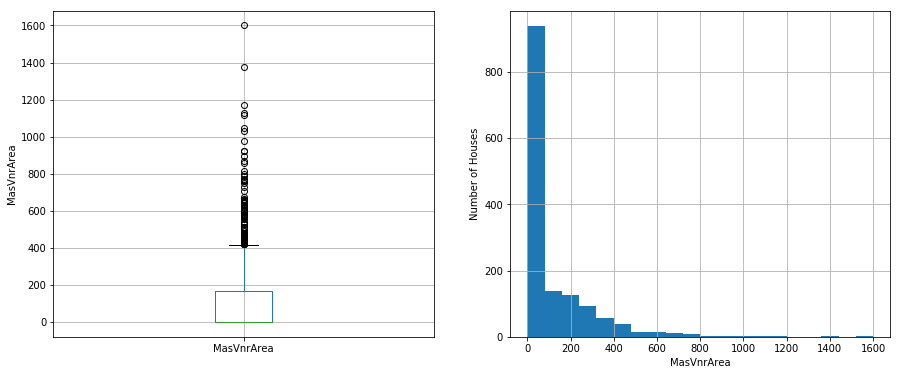

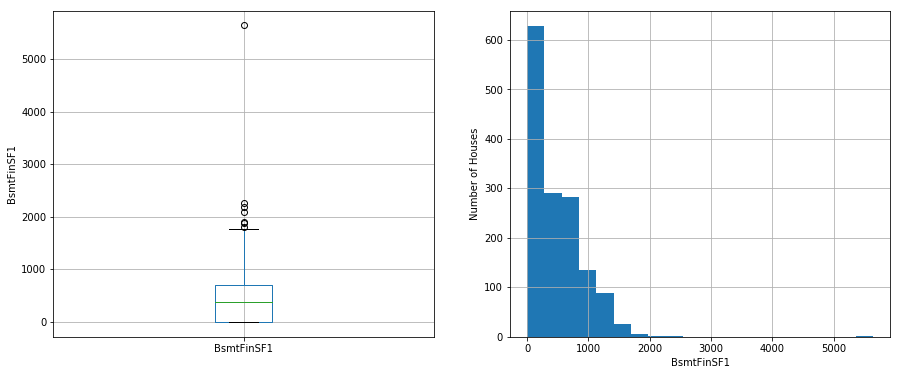

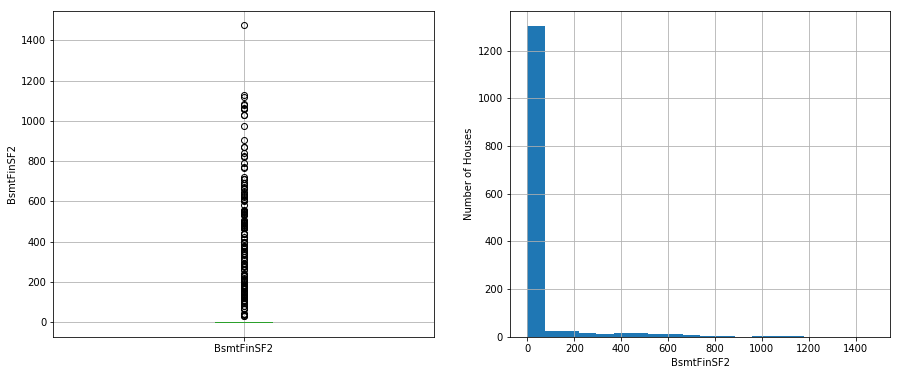

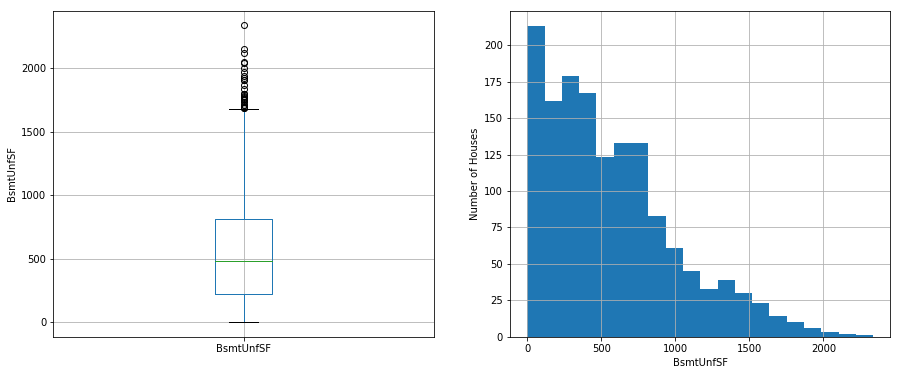

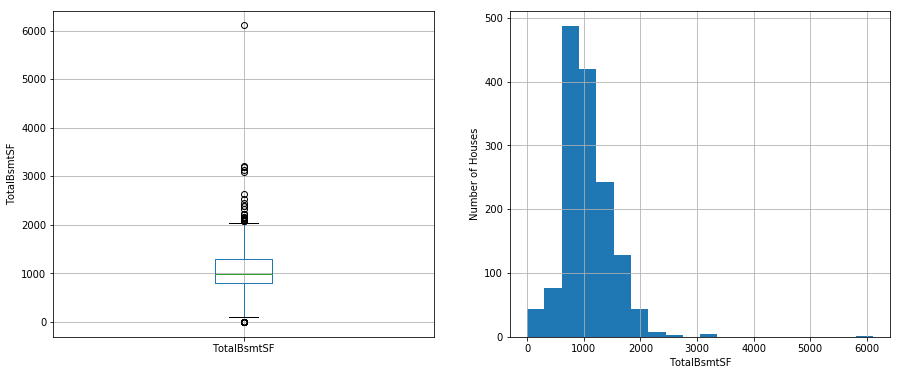

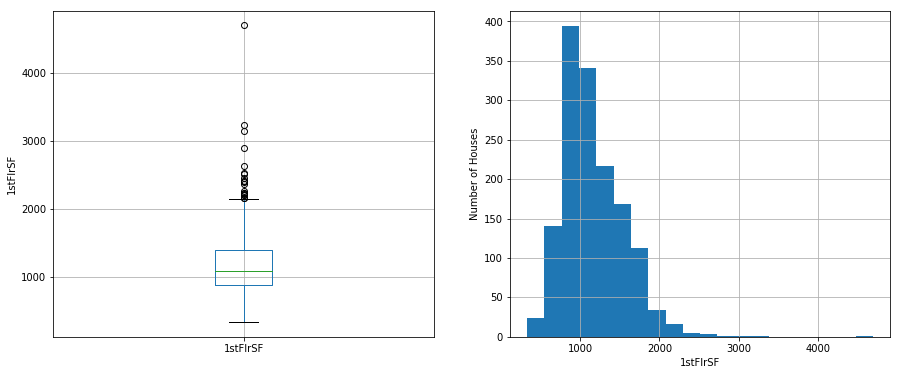

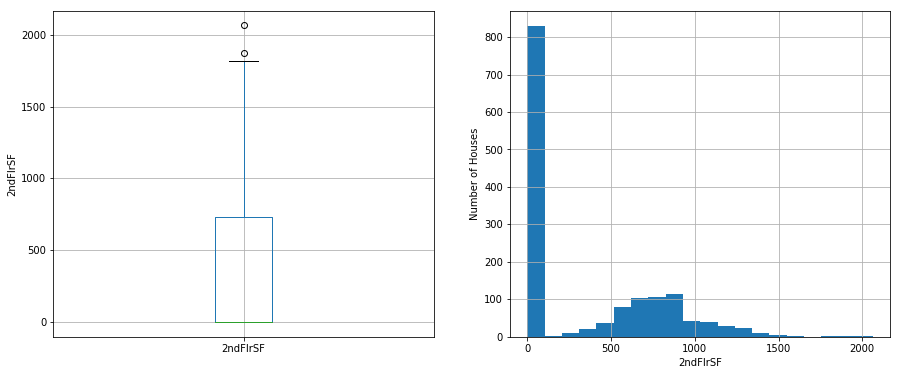

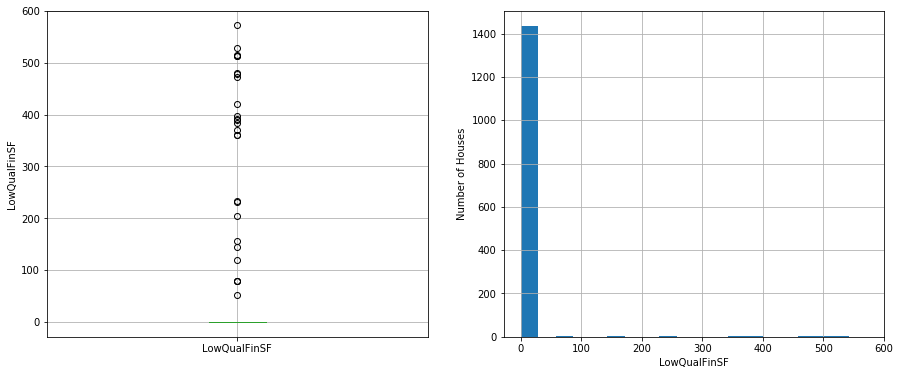

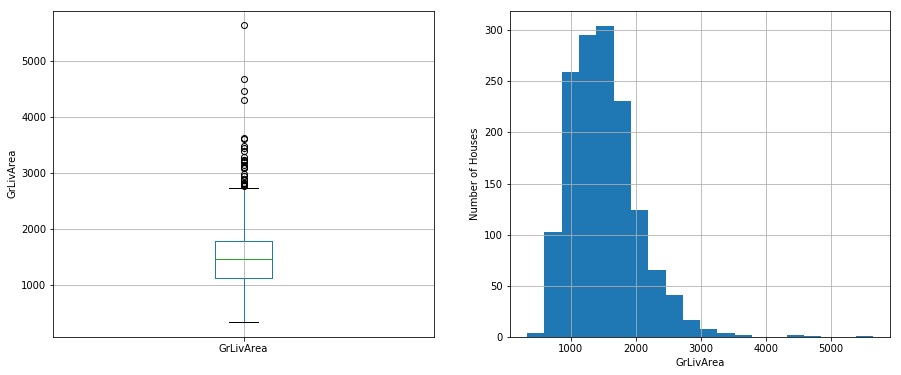

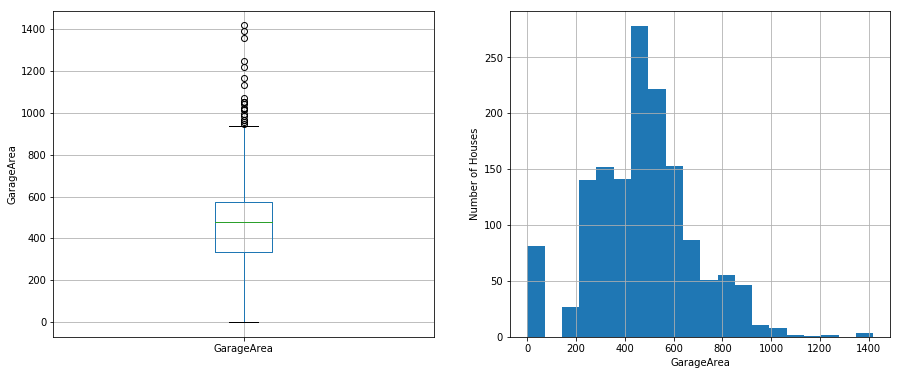

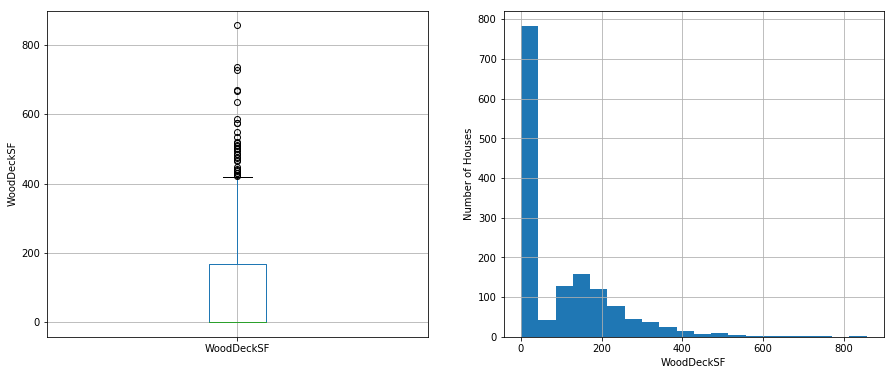

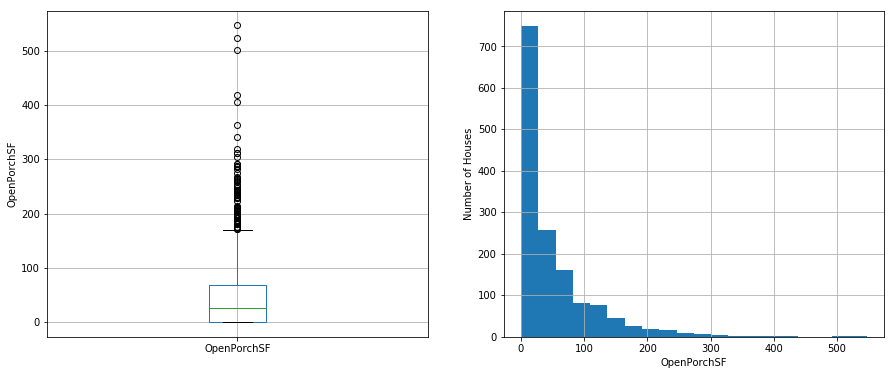

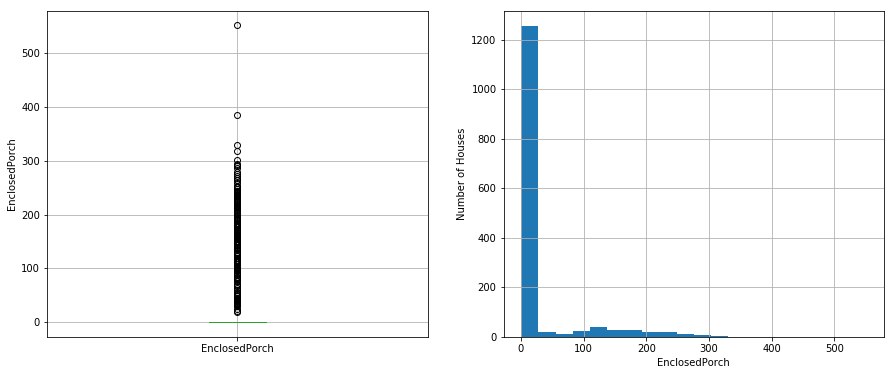

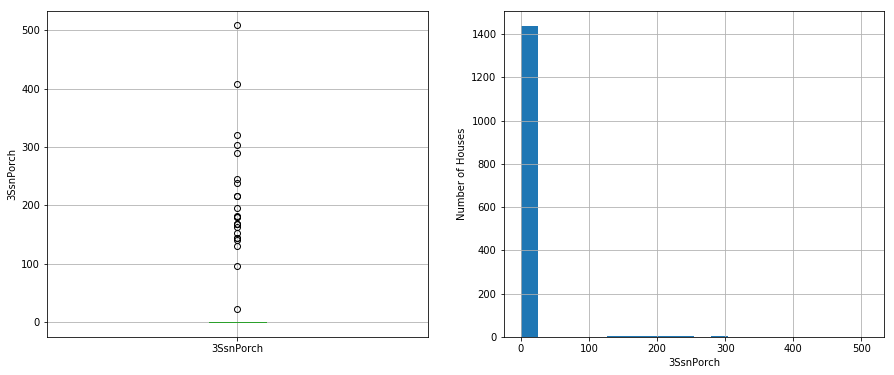

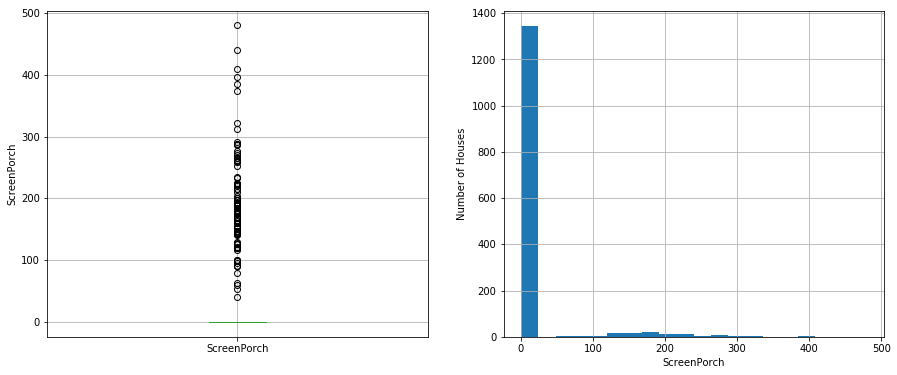

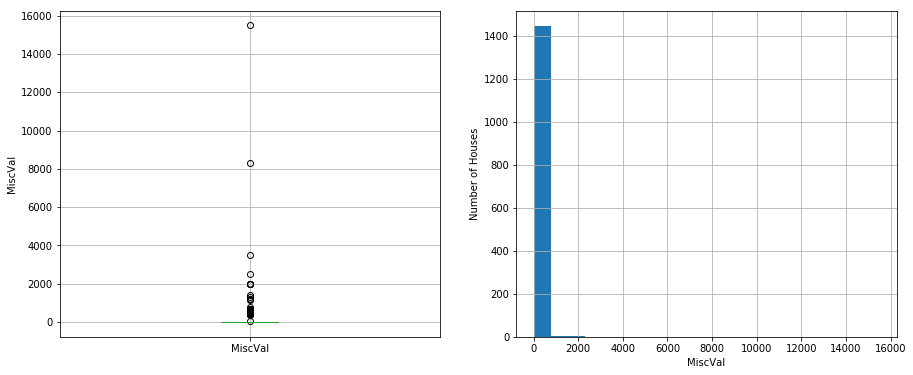

In [16]:
# Plotting box plots of numerical variables to visualise outliers and histograms for distribution
for var in numerical:
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    fig = data.boxplot(column = var)
    fig.set_title = ('')
    fig.set_ylabel(var)
    
    plt.subplot(1,2,2)
    fig= data[var].hist(bins = 20)
    fig.set_ylabel('Number of Houses')
    fig.set_xlabel(var)
    
    plt.show()

The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, we will do discretisation. We will use trees to find the right buckets onto which we will divide the variables.

### Outliers in discrete variables
Now, let's identify outliers in numerical discrete variables. We will call outliers, those values that are present in less than 1% of the houses. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical.

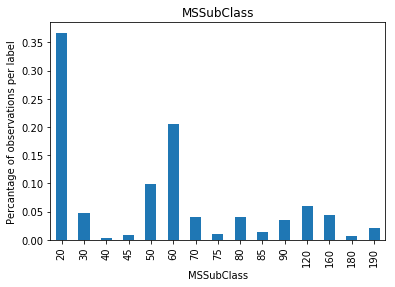

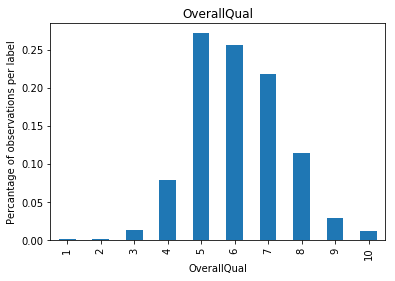

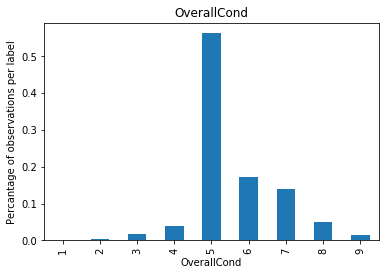

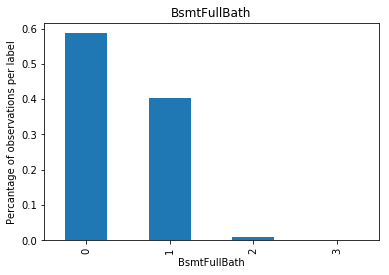

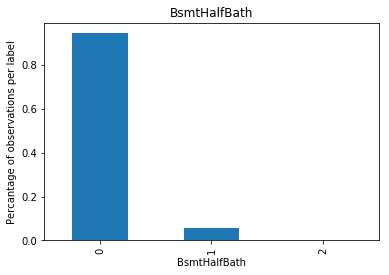

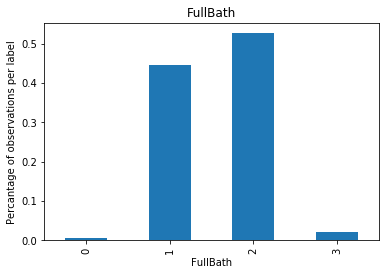

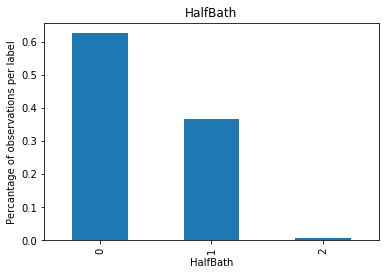

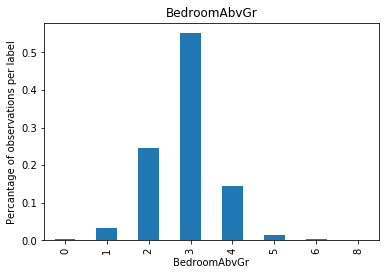

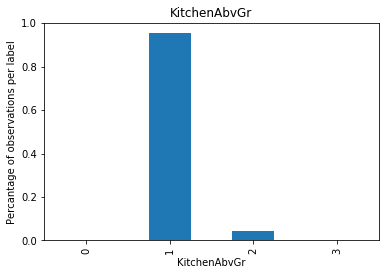

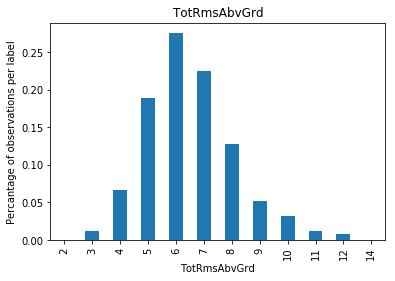

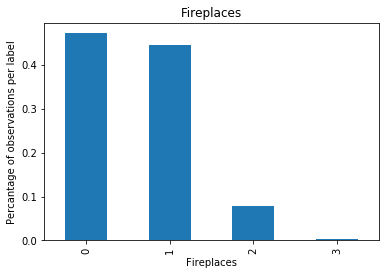

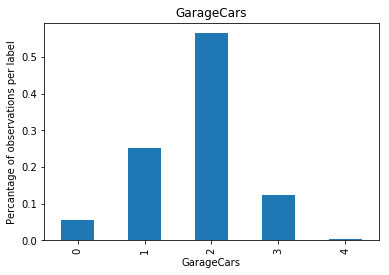

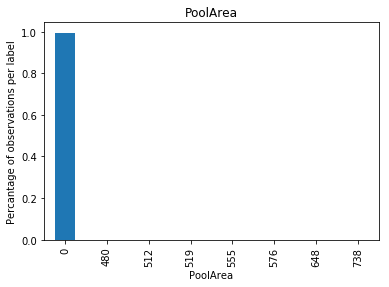

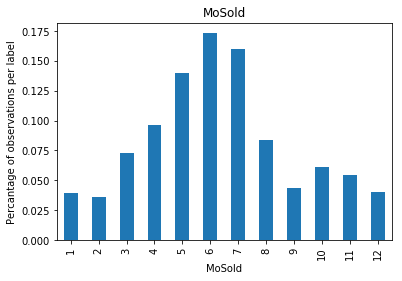

In [17]:
for var in discrete:
    (data.groupby(var)[var].count()/ np.float(len(data))).plot.bar()
    plt.ylabel("Percantage of observations per label")
    plt.title(var)
    plt.show()
    
    

Most of the discrete variables show values that are shared by a tiny proportion of houses in the dataset. For linear regression, this may not be a problem, but it most likely will be for tree methods.

#### Number of labels: cardinality
Let's go ahead now and examine our categorical variables. First we will determine whether they show high cardinality. This is, a high number of labels.

Text(0,0.5,'Number of labels')

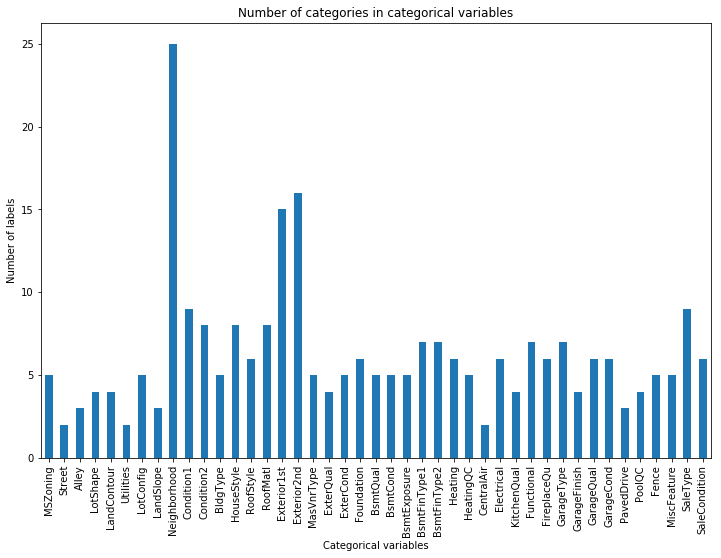

In [18]:
no_labels_ls = []
for var in categorical:
    no_labels_ls.append(len(data[var].unique()))
    
tmp = pd.Series(no_labels_ls)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize = (12,8))
plt.title("Number of categories in categorical variables")
plt.xlabel('Categorical variables')
plt.ylabel("Number of labels")

Most of the variables, contain only a few labels, so we do not have to deal with high cardinality. 

#### Separate the data into train and test

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size = 0.1, random_state = 0)

X_train.shape, X_test.shape

((1314, 81), (146, 81))

### Feature Engineering

####  Extracting Information from the temporal variables

In [20]:
# function to calculate elapsed time
def elapsed_years(df, var):
    # capture the difference between the temporal variables and Year the house was sold
    df[var] = df['YrSold'] - df[var]
    return(df)

In [21]:
# apply the function
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train,var)
    X_test = elapsed_years(X_test,var)
    submission = elapsed_years(submission,var)

In [22]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2,2,2.0
656,49,2,49.0
45,5,5,5.0
1348,9,9,9.0
55,44,44,44.0


Instead of years, now we have the amount of years passed since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [23]:
# drop YrSold
X_train.drop('YrSold', axis = 1, inplace = True)
X_test.drop('YrSold', axis = 1, inplace = True)
submission.drop('YrSold', axis = 1, inplace = True)

#### Engineering missing values in numerical variables : Continuous variables

In [24]:
# print variables with missing data
# the newly created temporal variables will also be treated as numerical and continuos

year_vars.remove('YrSold')

for col in numerical+year_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


- LotFrontage and GarageYrBlt: These variables show more than 5% NA, so we will create additional variable with NA + median imputation

- MasVnrArea: Less than 5% NA so: median imputation

In [25]:
# add variable indicating missingness + median imputation
for df in  [X_train, X_test, submission]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        # add variable to indicate missingness
        df[var+'_NA'] = np.where(df[var].isnull(), 1 , 0)
        df[var].fillna(X_train[var].median(), inplace = True)
        
for df in [X_train, X_test, submission]:
    df['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace = True)

#### Missing values in Discrete variables

In [26]:
# print discrete variables with missing values
for var in discrete:
    if X_train[var].isnull().mean()>0:
        print(var, X_train[var].isnull().mean())

There are no missing data in the discrete variables. Good, then we don't have to engineer them.

#### Engineering Missing Data in categorical variables 

In [27]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.0045662100456621
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


We will add a 'Missing' Label to all of them. If the missing data are rare, we will handle those together with rare labels in a subsequent engineering step.

In [28]:
# add label indicating 'Missing' to categorical variables
for df in [X_train, X_test, submission]:
    for var in categorical:
        df[var].fillna('missing', inplace= True)

In [29]:
# check absence of null values in train data
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [30]:
# check absence of null values in test data
for var in X_test.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

In [31]:
# check absence of null values in submission data
submission_vars = []
for var in X_train.columns:
    if var != 'SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())
        submission_vars.append(var)


BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


There are a few variables in the submission dataset, that did not show NA in the training dataset. For these variables, and to be able to score them using machine learning algorithms, we will fill the NA with the median value.

In [32]:
# Fill NA with median value for those variables that show NA only in the submission set
for var in submission_vars:
    submission[var].fillna(X_train[var].median(), inplace = True)

#### Outliers in Numerical variables 

In order to tackle outliers and skewed distributions at the same time, earlier we mentioned we would do discretisation. And in order to find the optimal buckets automatically,we would use decision trees to find the buckets.

In [33]:
# function to create bins with decision tree
def tree_discretiser(var):
    score_ls = []  # store the scores
    
    for tree_depth in [1,2,3,4]:
        #call the model
        tree = DecisionTreeRegressor(max_depth=tree_depth)
        
        # train the model using 3 fold cross validation
        scores = cross_val_score(tree, X_train[var].to_frame(), y_train, cv = 3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))
    
    # find the depth with minimum score
    depth = [1,2,3,4][np.argmin(score_ls)]
    
    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())
    submission[var] = tree_model.predict(submission[var].to_frame())

In [34]:
# apply the function
for var in numerical:
    tree_discretiser(var)

In [35]:
# view thw newly created features
X_train[numerical].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
930,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,136612.858407,264085.159722,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,182097.497627
656,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,184535.337349,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,182097.497627
45,167762.37606,158953.135556,242979.107639,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,182097.497627
1348,167762.37606,229056.903382,163654.383041,303758.906780,182044.330197,184535.337349,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,166268.000000,187252.10559,180574.090417,178797.429397,182097.497627
55,236725.29249,158953.135556,242979.107639,168932.967391,182044.330197,165782.797872,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,249923.400000,178797.429397,182097.497627


In [36]:
# let's explore how many different buckets we have now among our engineered continuous variables
for var in numerical:
    print(var, len(X_train[var].unique()))

LotFrontage 2
LotArea 2
MasVnrArea 2
BsmtFinSF1 2
BsmtFinSF2 13
BsmtUnfSF 8
TotalBsmtSF 2
1stFlrSF 2
2ndFlrSF 2
LowQualFinSF 2
GrLivArea 2
GarageArea 2
WoodDeckSF 14
OpenPorchSF 14
EnclosedPorch 10
3SsnPorch 7
ScreenPorch 8
MiscVal 4


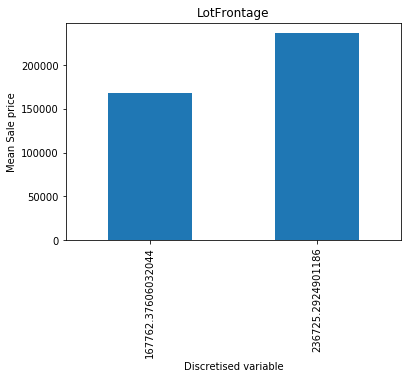

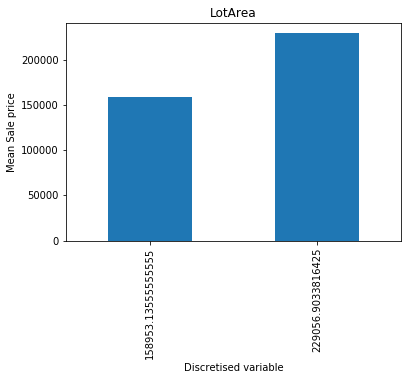

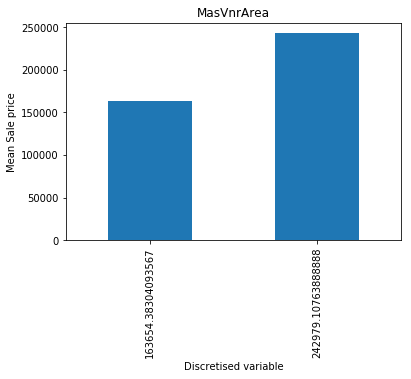

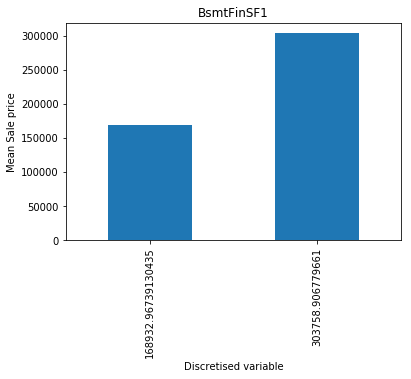

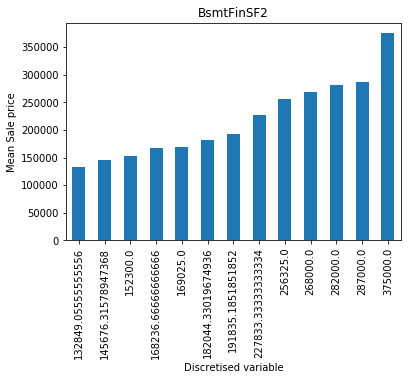

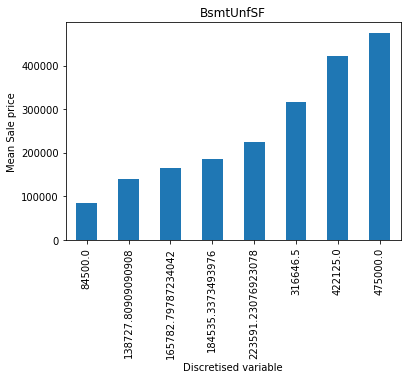

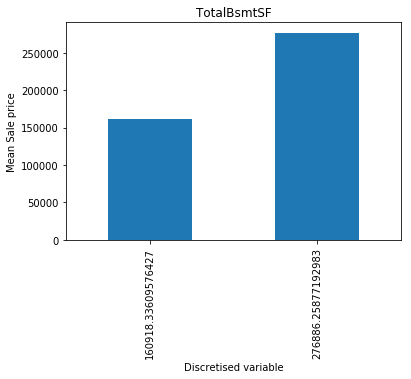

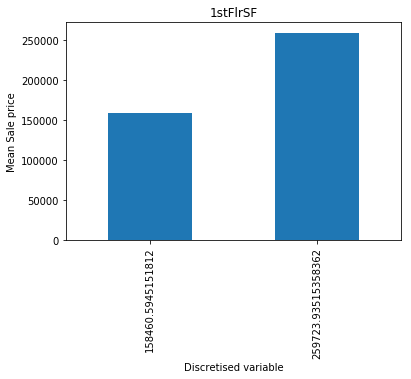

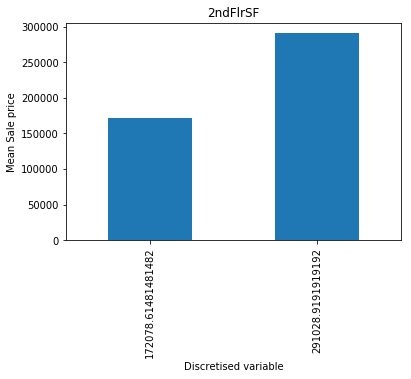

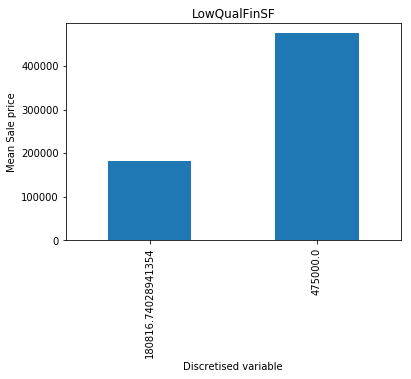

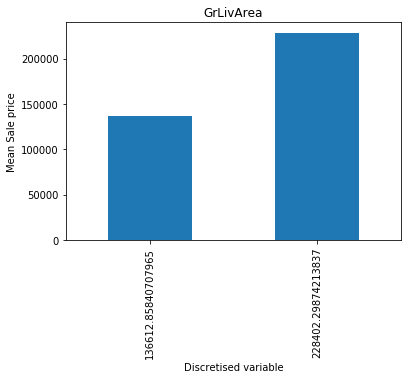

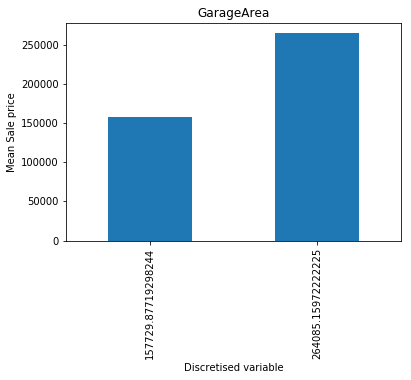

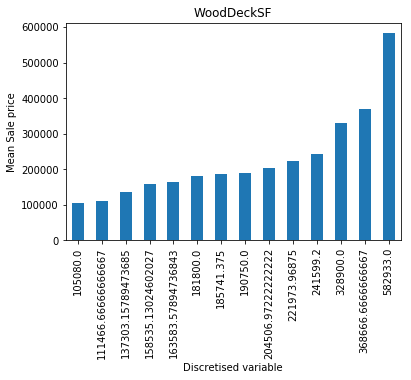

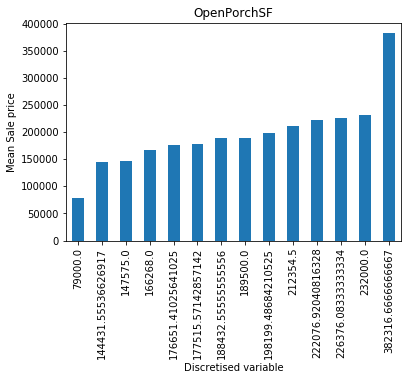

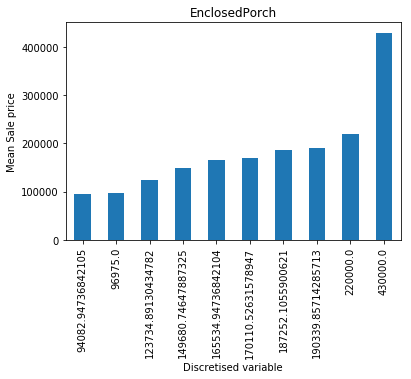

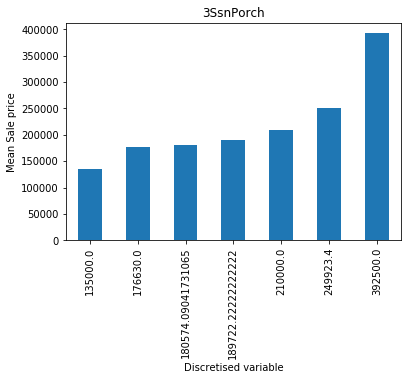

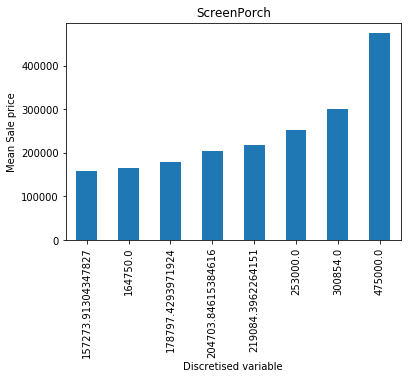

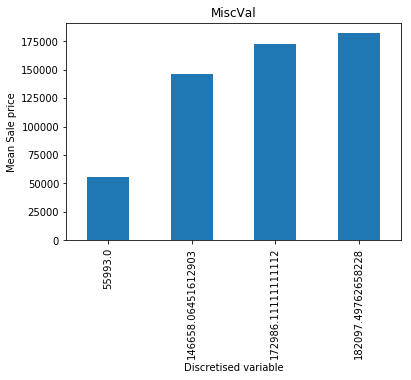

In [37]:
# Visualise the relation between the target and discretised numerical variable
for var in numerical:
    X_train.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('Mean Sale price')
    plt.xlabel('Discretised variable')
    
    plt.show()

We can see that the mean House Price value increases with the value of the bucket. This means we managed to create a monotonic distribution between the numerical variable and the target.

#### Engineering rare labels in categorical and discrete variables

In [39]:
# define function to treat the rare labels

def rare_imputation(variable):
    # find frequent labels / discrete numericals
    temp = X_train.groupby(variable)[variable].count()/np.float(len(X_train))
    freq_cat = [x for x in temp.loc[temp > 0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(freq_cat), X_train[variable],'Rare')
    X_test[variable] = np.where(X_test[variable].isin(freq_cat),X_test[variable],'Rare')
    submission[variable] = np.where(submission[variable].isin(freq_cat), submission[variable],'Rare')

In [40]:
# the following variables in submission data are encoded in different type, so lets convert them to same format as in train

for var in ['BsmtFullBath', 'BsmtHalfBath','GarageCars']:
    submission[var] = submission[var].astype('int')

In [41]:
# Replace the rare labels in categorical variables
for var in categorical:
    rare_imputation(var)
    
    
# Replace in discrete variables
for var in discrete:
    rare_imputation(var)

In [42]:
# check if any NA were created in submission due to rare label imputation
for var in X_train.columns:
    if var != 'SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())
        submission_vars.append(var)

There were no NAs introduced.

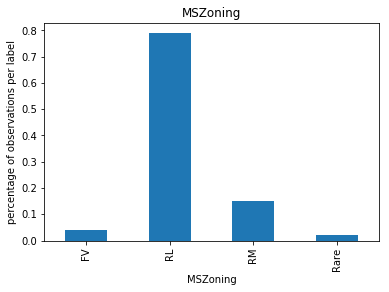

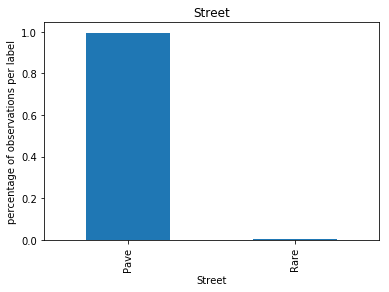

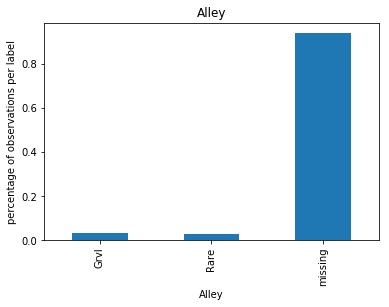

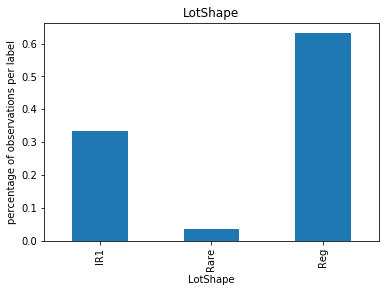

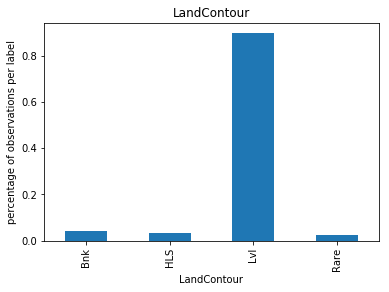

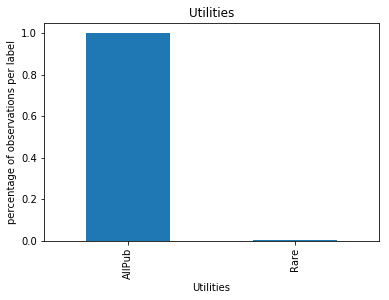

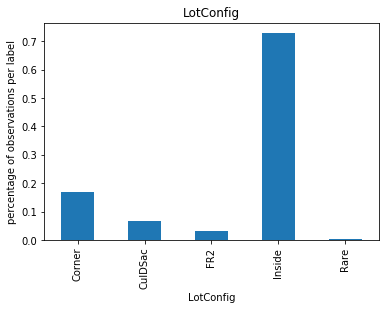

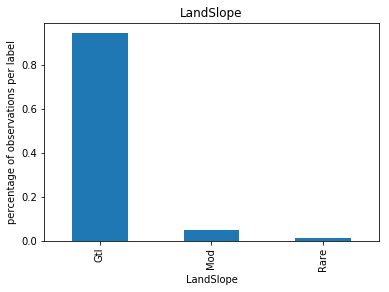

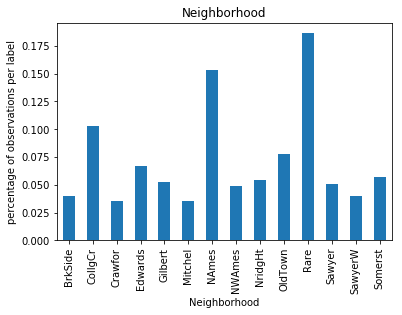

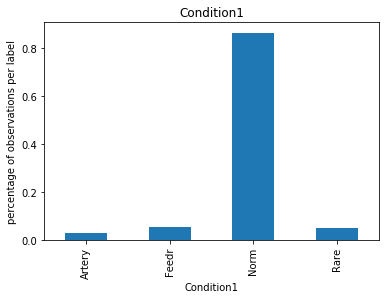

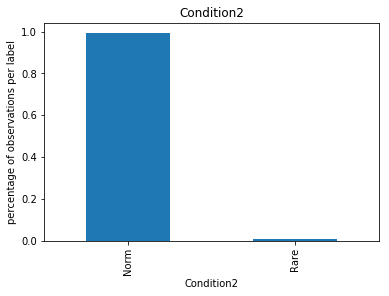

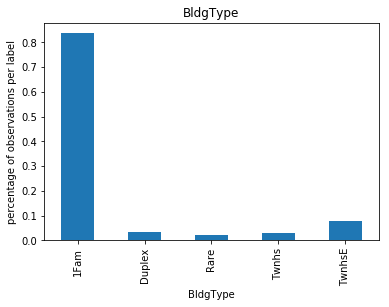

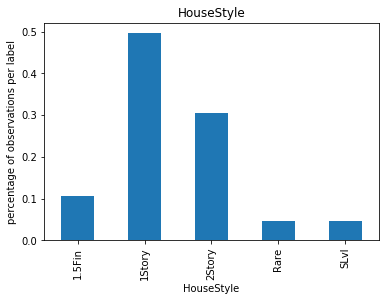

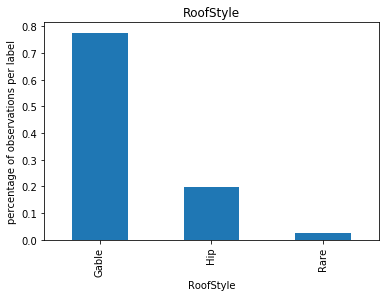

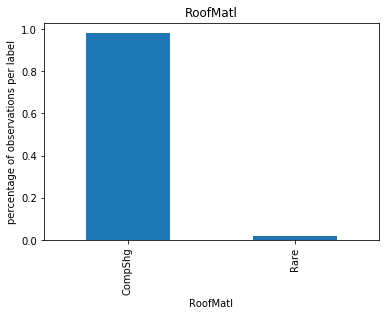

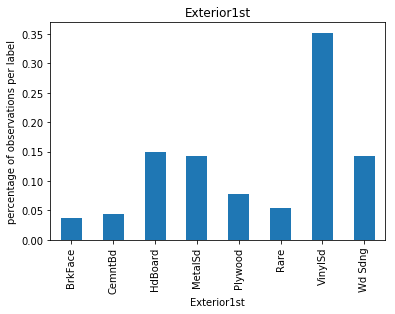

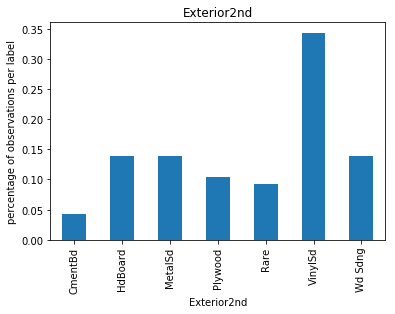

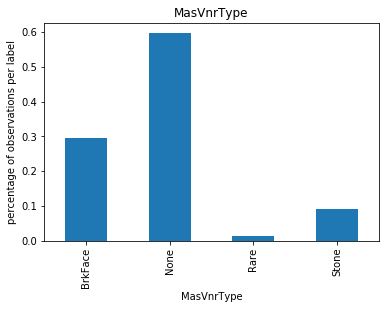

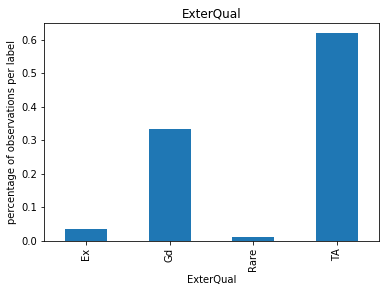

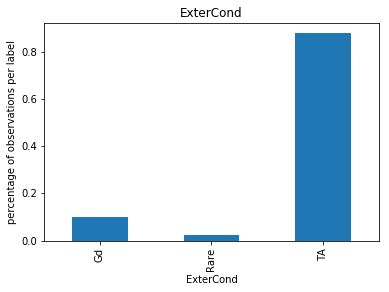

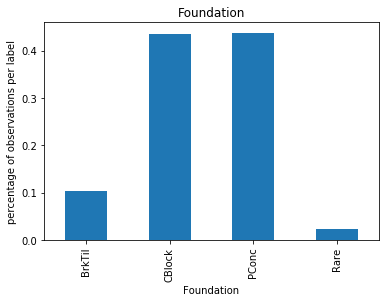

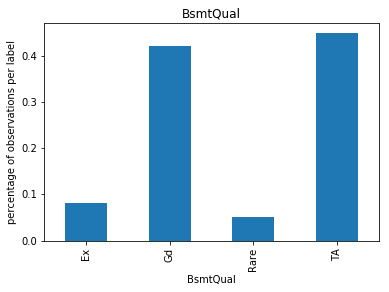

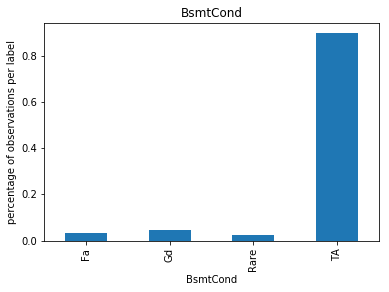

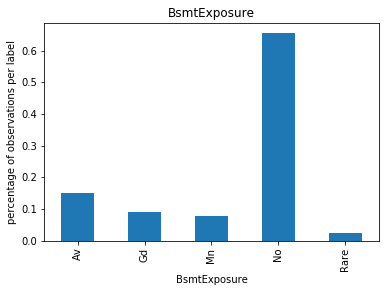

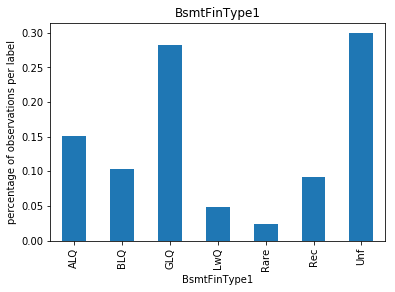

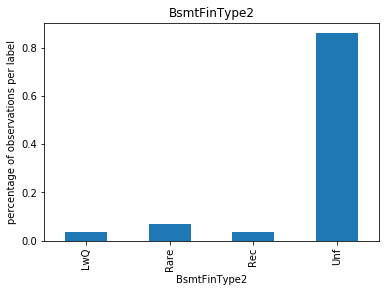

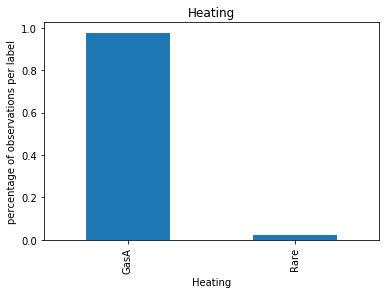

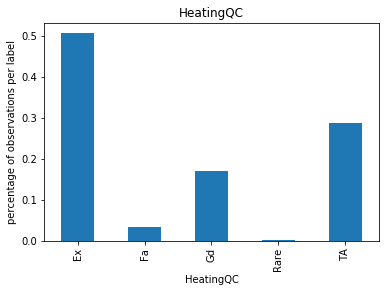

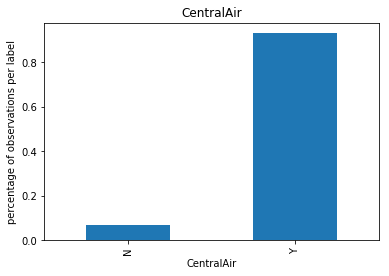

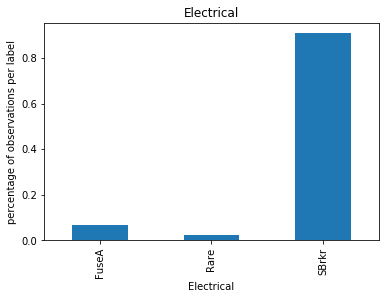

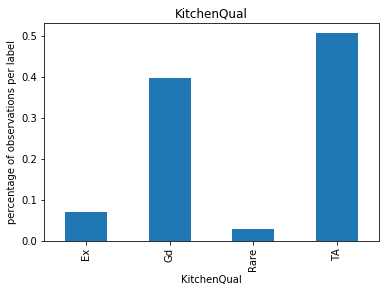

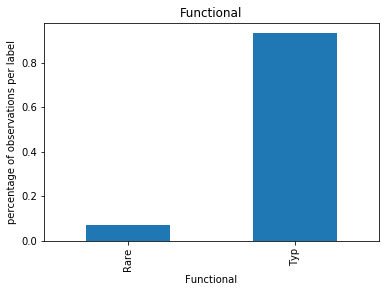

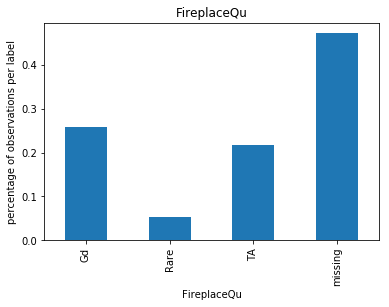

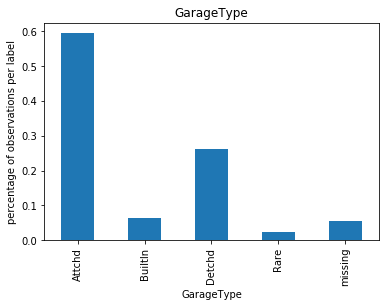

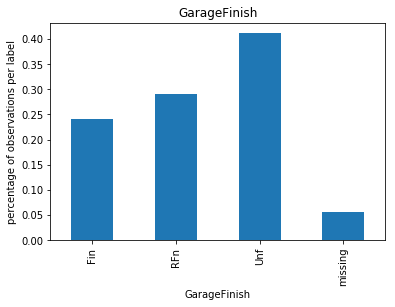

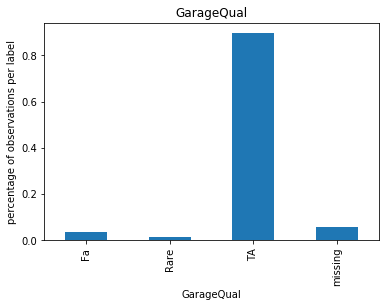

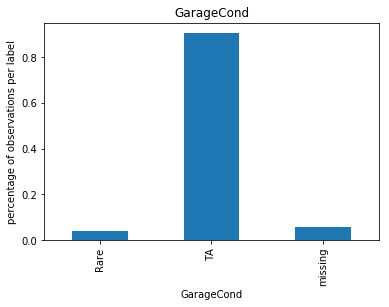

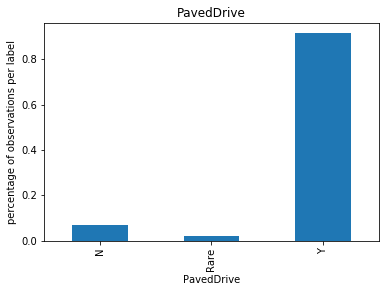

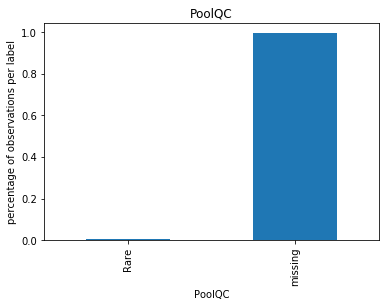

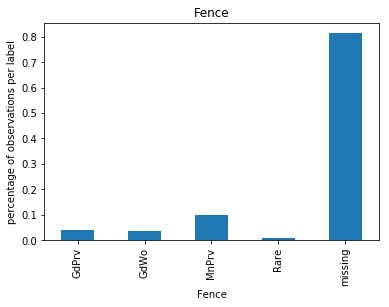

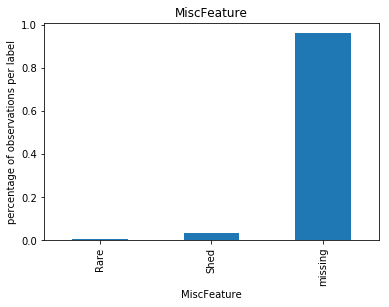

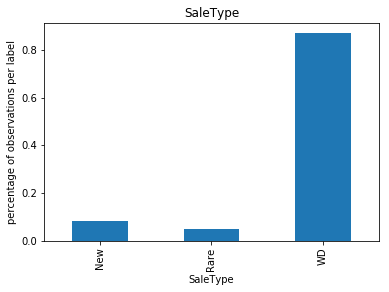

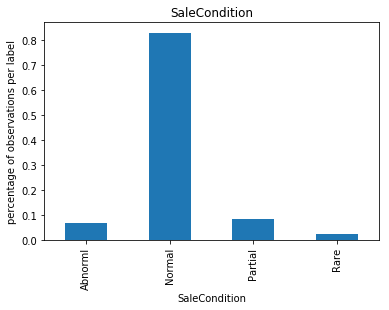

In [44]:
# Lets check if the rare label imputation worked.
for var in categorical:
    (X_train.groupby(var)[var].count()/np.float(len(X_train))).plot.bar()
    plt.ylabel('percentage of observations per label')
    plt.title(var)
    plt.show()

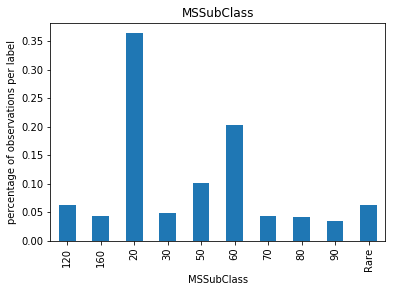

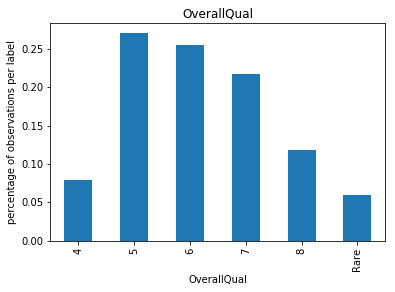

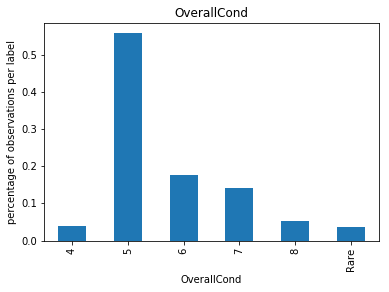

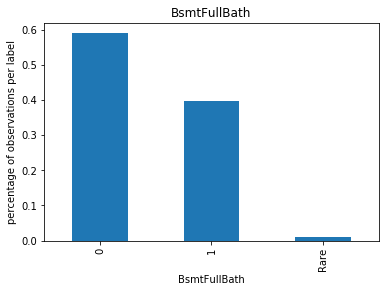

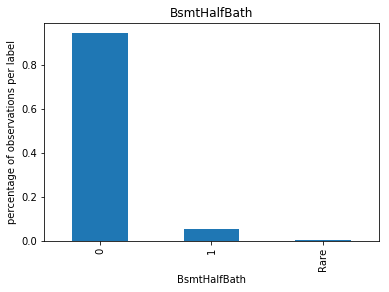

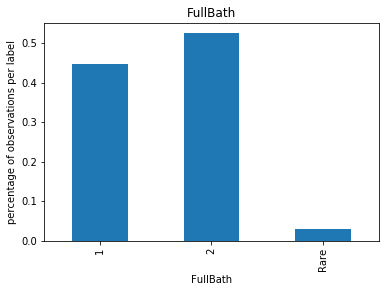

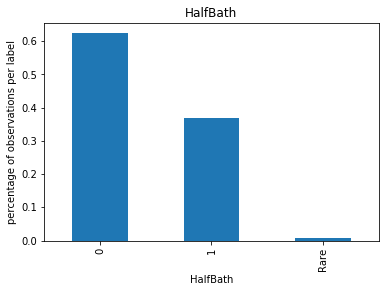

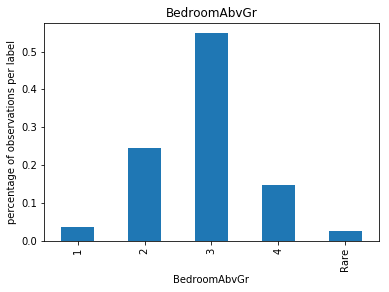

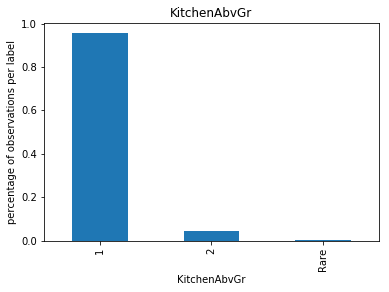

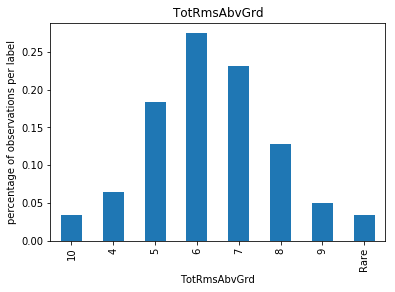

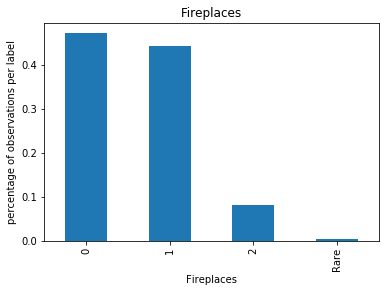

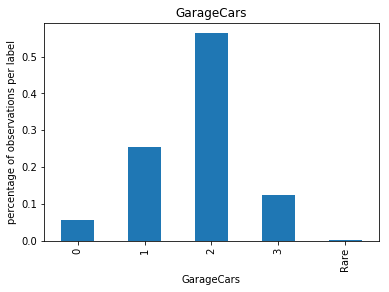

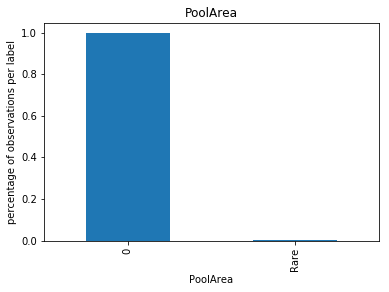

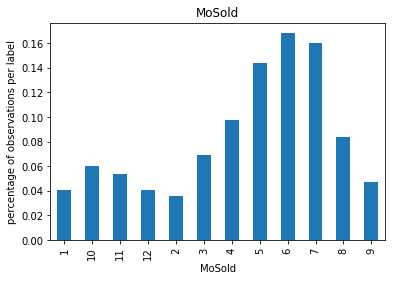

In [45]:
# for discrete variables
for var in discrete:
    (X_train.groupby(var)[var].count()/np.float(len(X_train))).plot.bar()
    plt.ylabel('percentage of observations per label')
    plt.title(var)
    plt.show()

We have replaced the infrequent labels in both categorical and discrete variables with 'Rare' label as seen from the plots.

#### Encode Categorical and discrete variables 

We will encode the categorica variables with target encoding, where labels will be replaced by the mean of SalePrice for the label.

In [46]:
# function to encode the categorical and discrete variables
def encode_categorical(var, target):
    #make label to mean price dictionary
    ordered_labels = X_train.groupby(var)[target].mean().to_dict()
    
    #encode the variables
    X_train[var] = X_train[var].map(ordered_labels)
    X_test[var] = X_test[var].map(ordered_labels)
    submission[var] = submission[var].map(ordered_labels)
    
# apply the function to encode the labels in categorical and discrete variables
#categorical
for var in categorical:
    encode_categorical(var,'SalePrice')
    
#doscrete
for var in discrete:
    encode_categorical(var, 'SalePrice')

In [47]:
# sanity check, lets check we did not intoduce NAs in submission
for var in X_train.columns:
    if var != 'SalePrice' and submission[var].isnull().sum()>0:
        print(var, submission[var].isnull().sum())

In [48]:
# check the data after categorical encoding
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
930,931,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,229102.255814,181073.785225,176923.341336,179949.742534,203489.946939,184202.50044,181114.067536,185740.182894,176486.047546,273483.000000,203106.269126,2,2,171319.443683,179722.971296,215247.326134,216064.221239,155917.553571,163654.383041,231040.800000,184094.602253,225871.299130,203881.873188,183805.015293,203036.095960,236866.435484,168932.967391,184463.10168,182044.330197,223591.230769,276886.258772,182115.031931,215075.475976,186569.561275,187320.733445,259723.935154,172078.614815,180816.740289,136612.858407,165147.890464,181297.887994,212795.308696,162838.57265,181029.186111,183542.560606,213391.308429,195928.690789,183618.068684,141047.961353,141047.961353,202501.549872,2.0,239303.034810,309977.853659,264085.159722,187768.181664,188346.234454,186926.069109,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,187715.285981,182136.371338,182097.497627,184207.900000,173346.078671,175368.825368,201000,0,0
656,657,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,180454.298052,181073.785225,176923.341336,179949.742534,146653.696517,184202.50044,181114.067536,185740.182894,176486.047546,133745.805634,159751.766304,49,2,171319.443683,179722.971296,161838.040609,166403.519126,205447.897436,163654.383041,231040.800000,184094.602253,150529.160558,141171.125637,183805.015293,166205.981395,161723.106061,168932.967391,184463.10168,182044.330197,184535.337349,160918.336096,182115.031931,215075.475976,186569.561275,187320.733445,158460.594515,172078.614815,180816.740289,136612.858407,203574.293893,181297.887994,135514.882453,212163.63843,181029.186111,183542.560606,213391.308429,141752.929461,183618.068684,141047.961353,141047.961353,202501.549872,49.0,202789.618799,128360.834835,157729.877193,187768.181664,188346.234454,186926.069109,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,145283.748092,182136.371338,182097.497627,185207.736364,173346.078671,175368.825368,145500,0,0
45,46,200763.148148,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,164928.283474,180454.298052,181073.785225,176923.341336,179949.742534,315191.901408,184202.50044,181114.067536,182123.300971,176486.047546,294348.576923,203106.269126,5,5,219039.383142,179722.971296,148333.844920,148397.961538,205447.897436,242979.107639,371951.531915,184094.602253,225871.299130,327072.598131,183805.015293,166205.981395,236866.435484,168932.967391,184463.10168,182044.330197,223591.230769,276886.258772,182115.031931,215075.475976,186569.561275,187320.733445,259723.935154,172078.614815,180816.740289,228402.298742,203574.293893,181297.887994,212795.308696,162838.57265,158790.238390,183542.560606,324619.989011,161003.847645,183618.068684,212674.463918,228513.814159,202501.549872,5.0,202789.618799,184038.209459,157729.877193,187768.181664,188346.234454,186926.069109,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,187

We see that the categorical variables have been replaced by the mean saleprice.

#### Feature Scaling

In [49]:
X_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,736.230594,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,36.874429,23.031202,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,29.426180,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,0.177321,0.056317
std,422.410752,38808.314261,26199.490720,27202.168491,32578.624196,2894.262502,11596.886609,22203.246215,12496.527972,1202.064041,12252.421306,4473.563558,46324.135172,12378.889534,799.639940,14443.396437,22118.086370,55373.367775,25689.624796,30.424945,20.674420,18987.049945,9465.046408,31222.482231,29849.145703,34692.124836,32828.304387,55307.593633,11738.300408,40048.407098,54135.969770,18564.012040,31474.766214,37025.161496,38561.152257,8936.859617,12458.876505,26757.025792,43932.929977,7031.636148,35121.370816,20397.476096,19824.089401,42166.629312,31408.069863,8115.593269,45888.734488,19155.180393,1231.986901,43969.360794,23778.354096,18218.274540,11460.774121,53401.249548,39020.198392,9452.511123,38521.652511,38773.307482,39521.671622,24.168823,43879.853129,56100.658727,44014.821429,22988.130523,22934.186102,19330.485641,32056.720234,37326.620936,19655.245498,7426.510849,14425.004989,2097.293089,2097.293089,15505.675991,5456.509673,6464.119661,6799.785827,29337.716048,30218.520557,

We see that for the categorical and discrete variables the mean value is the mean of SalePrice as we replace them with the mean value. But the standard deivation varies depending on the nature of the original variable.

In [50]:
# creating a list of variables to use for training
training_vars = [var for var in X_train.columns if var not in ['Id','SalePrice']]

print("Total number of variables to use for training:", len(training_vars))

Total number of variables to use for training: 80


In [51]:
# fit the scalar
scaler = MinMaxScaler()
scaler.fit(X_train[training_vars])

MinMaxScaler(copy=True, feature_range=(0, 1))

### Machine Learning Models

The distribution of SalePrice is skewed, so lets use the log of the SalePrice to fit the models.

#### Xgboost

In [57]:
xgb_model = xgb.XGBRegressor()
eval_set = [(X_test[training_vars], np.log(y_test))]
xgb_model.fit(X_train[training_vars], np.log(y_train), eval_set=eval_set, verbose = False)

pred_train = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, np.exp(pred_train))))
print('xgb train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred_train)))))
print()

pred_test = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, np.exp(pred_test))))
print('xgb test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred_test)))))


xgb train mse: 411750478.1958386
xgb train rmse: 20291.635670784122

xgb test mse: 1248980709.6125262
xgb test rmse: 35340.921176626485


Xgboost show some overfitting with respect to rmse for train and test

#### Support vector machine

In [68]:
svr_model = SVR()

svr_model.fit(scaler.transform(X_train[training_vars]), np.log(y_train))

pred_train = svr_model.predict(scaler.transform(X_train[training_vars]))
print('SVR train mse: {}'.format(mean_squared_error(y_train, np.exp(pred_train))))
print('SVR train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred_train)))))
print()

pred_test = svr_model.predict(scaler.transform(X_test[training_vars]))
print('SVR test mse: {}'.format(mean_squared_error(y_test, np.exp(pred_test))))
print('SVR test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred_test)))))


SVR train mse: 711028260.2232735
SVR train rmse: 26665.113167269206

SVR test mse: 1161739343.9453852
SVR test rmse: 34084.29761554997


#### Regularised Linear Regression

In [69]:
lin_model = Lasso(random_state = 2909, alpha = 0.005)

lin_model.fit(scaler.transform(X_train[training_vars]), np.log(y_train))

pred_train = lin_model.predict(scaler.transform(X_train[training_vars]))
print('Lasso linear train mse: {}'.format(mean_squared_error(y_train, np.exp(pred_train))))
print('Lasso linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred_train)))))
print()

pred_test = lin_model.predict(scaler.transform(X_test[training_vars]))
print('Lasso linear test mse: {}'.format(mean_squared_error(y_test, np.exp(pred_test))))
print('Lasso linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred_test)))))


Lasso linear train mse: 1141198152.8570888
Lasso linear train rmse: 33781.62448517076

Lasso linear test mse: 1564309979.8790731
Lasso linear test rmse: 39551.358761477124


The best model is Support vector machine, so let predict the price for submision data

In [71]:
# sumbmission to kaggle
final_pred = svr_model.predict(scaler.transform(submission[training_vars]))

In [72]:
temp = pd.concat([submission.Id, pd.Series(np.exp(final_pred))], axis = 1)
temp.columns = ['Id', 'SalePrice']
temp.head()

,Id,SalePrice
0,1461,108312.415376
1,1462,146718.772002
2,1463,180101.784355
3,1464,191668.958578
4,1465,171375.944337


In [73]:
temp.to_csv('submit_housesale.csv', index = False)